## Structural Dynamics - Modal Analysis in Python

### Background
This notebook was created during course work for Structural Dynamics class at UET Peshawar.

#### Course Instructur: Dr Fahad

### About the Code
I literally wrote this in 30 minutes to solve an assignment deadline. It works fine for all the problems in Structural Dynamics book. 🤢🤢🤢🤢🤢

### License 
Do whatever you want with it. No license. Use it however you seem fit.

### About Me
I am Has. A Civil Engineering enthusiast and a programming geek.

### Sections
* [Modal Analysis Basic](#modal_analysis)
* [Rayleigh Method](#rayleigh)
* [Vionello Stodola Method](#stodola)

## Import necessary Modules

In [64]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
from copy import deepcopy
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from IPython.display import Latex, Math

## Given Data
I use metric units whenever possible

In [65]:
m = 2#0000 #kg
k1=k2=k3=k = 1e3 #N/m

M = m*eye(3)
k =Matrix([
     [k1+k2, -k2, 0],
    [-k2, k1+k2, -k3],
    [0, -k3, k3]
    ])#*1e7
    

## Display Mass Matrix
just to be sure

In [66]:
display(M)

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 2]])

## Display Stiffness Matrix

In [67]:
display(k)

Matrix([
[ 2000.0, -1000.0,       0],
[-1000.0,  2000.0, -1000.0],
[      0, -1000.0,  1000.0]])

## Let's Derive the Characteristic Polynomial

In [68]:
omega_n = Symbol('omega_n')
eq = k - omega_n**2 * M
det = eq.det()
display(det)

-8.0*omega_n**6 + 20000.0*omega_n**4 - 12000000.0*omega_n**2 + 1000000000.0

## Display the Matrix for Eigen Value Problem

In [69]:
eq

Matrix([
[2000.0 - 2*omega_n**2,               -1000.0,                     0],
[              -1000.0, 2000.0 - 2*omega_n**2,               -1000.0],
[                    0,               -1000.0, 1000.0 - 2*omega_n**2]])

## Angular Frequency

In [70]:
f=lambdify(omega_n,det)

omega = Matrix([*fsolve(f,10), *fsolve(f,25), *fsolve(f,45)])
omega

Matrix([
[ 9.9514386948612],
[27.8833116046801],
[40.2925526848167]])

## Time Period

In [71]:
Tn = Matrix([2*pi/om for om in omega])
Tn.n()

Matrix([
[0.631384616821701],
[0.225338560794371],
[0.155939122455928]])

# Modal Analysis
<a id='modal_analysis'></a>

## Mode : 1

In [8]:
sys = eq.subs(omega_n, omega[0])
sys

Matrix([
[1801.93773580484,          -1000.0,                0],
[         -1000.0, 1801.93773580484,          -1000.0],
[               0,          -1000.0, 801.937735804838]])

In [9]:
phi_21, phi_31 = symbols('phi_21, phi_31')
vect = Matrix([1, phi_21, phi_31])
vect 

Matrix([
[     1],
[phi_21],
[phi_31]])

In [10]:
res = (sys*vect)
res

Matrix([
[                1801.93773580484 - 1000.0*phi_21],
[1801.93773580484*phi_21 - 1000.0*phi_31 - 1000.0],
[        -1000.0*phi_21 + 801.937735804838*phi_31]])

In [11]:
phi_21e = solve(res[0],phi_21)[0]
phi1 = Matrix([1, phi_21e, *solve(res[1].subs(phi_21,phi_21e) , phi_31)])
phi1


Matrix([
[               1],
[1.80193773580484],
[2.24697960371747]])

Normalization $\phi_1$

In [12]:
ABSnorm = lambda x: x/max(abs(x))

In [13]:
phi1_n = ABSnorm(phi1)
phi1_n

Matrix([
[0.445041867912628],
[0.801937735804838],
[              1.0]])

## Mode 2

In [14]:
sys = eq.subs(omega_n, omega[1])
sys

Matrix([
[445.041867912629,          -1000.0,                 0],
[         -1000.0, 445.041867912629,           -1000.0],
[               0,          -1000.0, -554.958132087371]])

In [15]:
phi_22, phi_32 = symbols('phi_22, phi_32')
vect = Matrix([1, phi_22, phi_32])
vect 

Matrix([
[     1],
[phi_22],
[phi_32]])

In [16]:
res = (sys*vect)
res

Matrix([
[                445.041867912629 - 1000.0*phi_22],
[445.041867912629*phi_22 - 1000.0*phi_32 - 1000.0],
[        -1000.0*phi_22 - 554.958132087371*phi_32]])

In [17]:
phi_22e = solve(res[0],phi_22)[0]
phi2 = Matrix([1, phi_22e, *solve(res[1].subs(phi_22,phi_22e) , phi_32)])
phi2

Matrix([
[                 1],
[ 0.445041867912629],
[-0.801937735804838]])

In [88]:
phi2_n = ABSnorm(phi2)
phi2_n

Matrix([
[                 1],
[ 0.445041867912629],
[-0.801937735804838]])

## Mode 3

In [18]:
sys = eq.subs(omega_n, omega[2])
sys

Matrix([
[-1246.97960371747,           -1000.0,                 0],
[          -1000.0, -1246.97960371747,           -1000.0],
[                0,           -1000.0, -2246.97960371747]])

In [19]:
phi_23, phi_33 = symbols('phi_23, phi_33')
vect = Matrix([1, phi_23, phi_33])
vect 

Matrix([
[     1],
[phi_23],
[phi_33]])

In [20]:
res = (sys*vect)
res

Matrix([
[                -1000.0*phi_23 - 1246.97960371747],
[-1246.97960371747*phi_23 - 1000.0*phi_33 - 1000.0],
[         -1000.0*phi_23 - 2246.97960371747*phi_33]])

In [21]:
phi_23e = solve(res[0],phi_23)[0]
phi3 = Matrix([1, phi_23e, *solve(res[1].subs(phi_23,phi_23e) , phi_33)])
phi3

Matrix([
[                1],
[-1.24697960371747],
[0.554958132087374]])

In [105]:
phi3_n = ABSnorm(phi3)
phi3_n

Matrix([
[0.801937735804836],
[             -1.0],
[ 0.44504186791263]])

## Plotting Mode Shapes

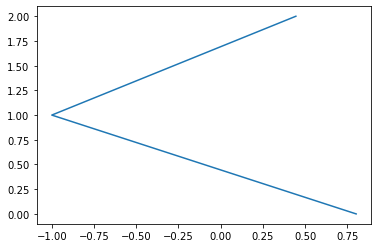

In [104]:
plt.plot(phi3_n,range(3))

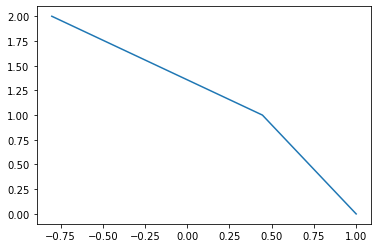

In [102]:
plt.plot(phi2_n,range(3))

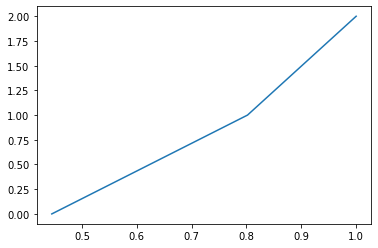

In [103]:
plt.plot(phi1_n,1*np.arange(3))

# Rayleigh Method for MDOF

<a id='rayleigh'></a>

In [23]:
stories = 3
psi = Matrix([i/3 for i in range(1,stories+1)])
psi

Matrix([
[0.333333333333333],
[0.666666666666667],
[              1.0]])

In [24]:
# Future me: Remove this
g = m*psi*10 # multiplying this so I can be consistent with slides
g

Matrix([
[6.66666666666667],
[13.3333333333333],
[            20.0]])

In [25]:
# mass of each storey
ms = Matrix([20, 20, 20])
ms

Matrix([
[20],
[20],
[20]])

In [26]:
ms  = np.array(ms)
psi = np.array(psi)
sf  = psi*ms

a,b = deepcopy(sf[0]), deepcopy(sf[2])
sf[0] = b
sf[2] = a

sf_max = sum(sf)[0]
print(sf_max)
pprint(sf)

40.0000000000000
[[20.0000000000000] 
 [13.3333333333333] 
 [6.66666666666667]]


In [27]:
af = np.cumsum(sf)
pprint(af)

[20.0000000000000 33.3333333333333 40.0000000000000]


In [28]:
theta = ones(3,1)*sf_max
theta[1] += af[1]
theta[2] += af[1] + af[0]
theta

Matrix([
[            40.0],
[73.3333333333333],
[93.3333333333333]])

In [29]:
k_star = (theta.T * g)[0] * 10**(3-4)
k_star

311.111111111111

In [30]:
m_star = (theta.T*m*theta)[0]*1e-4
m_star

3.13777777777778

In [31]:
omega_n_sq = k_star/m_star
omega_n_sq 

99.1501416430595

In [32]:
phi = theta*1e-4
phi

Matrix([
[              0.004],
[0.00733333333333333],
[0.00933333333333333]])

In [33]:
phi_n = ABSnorm(phi)
phi_n

Matrix([
[0.428571428571429],
[0.785714285714286],
[              1.0]])

# Vianello-Stodola
<a id='stodola'></a>

In [34]:
stories = 3
psi = Matrix([i/3 for i in range(1,stories+1)])
psi

Matrix([
[0.333333333333333],
[0.666666666666667],
[              1.0]])

In [35]:


# Future me: Remove this
g = m*psi*10 # multiplying this so I can be consistent with slides

# mass of each storey
ms = Matrix([20, 20, 20])

ms  = np.array(ms)
psi = np.array(psi)
sf  = psi*ms

a,b = deepcopy(sf[0]), deepcopy(sf[2])
sf[0] = b
sf[2] = a

sf_max = sum(sf)[0]

af = np.cumsum(sf)

theta = ones(3,1)*sf_max
theta[1] += af[1]
theta[2] += af[1] + af[0]

k_star = (theta.T * g)[0] * 10**(3-4)

m_star = (theta.T*m*theta)[0]*1e-4

omega_n_sq = k_star/m_star

phi = theta*1e-4

phi_n = ABSnorm(phi)
psi = phi_n
phi_n


Matrix([
[0.428571428571429],
[0.785714285714286],
[              1.0]])